# <span style="color:#60ab59">Instacart Product Sales Analysis </span>
### <span style = "color:darkorange">How can Instacart boost its sales (revenues) for grocery products sold through its app by using data to inform user experience (app design, app organization, promotions)? </span>

**Instacart** is a grocery delivery service in which customers can place orders from participating retailers and having the shopping done by a personal shopper. Because it is a subscription-based service, we need to be able to offer relevant products with ease to bring customers back to our services. With data on customers' orders (including types and quantities of products purchased, products reordered, time of purchases made, etc.) we can make predictive models of what and when customers might want to order. This data can be leveraged to customize the user experience, such as showing featured products (products the app recommends or promotes to users), organization of the app (designing the order in which products, aisles, or departments are featured). The applications of this analysis will enable users to easily and accessibly add products to their digital shopping carts with a single tap or click. 

In this analysis, I aim to:
<ul>
    <li> Identify most purchased products and product categories (departments & aisles) </li>
    <li> Identify product categories that are most reordered </li>
    <li> Analyze sales trends in relation to time (day of week & hour of day) </li>
</ul>
 
*The data was retrieved from The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 7/5/22*

#### Step 1: <span style="color:#60ab59">Import Libraries</span> 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("whitegrid")
mpl.rcParams['figure.figsize'] = (20,5)

#### Step 2: <span style="color:#60ab59">Import Data</span> 

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products__prior.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
print("Aisles CSV")
print(aisles.columns)
aisles.info()

Aisles CSV
Index(['aisle_id', 'aisle'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
print("Departments CSV")
print(departments.columns)
departments.info()

Departments CSV
Index(['department_id', 'department'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [5]:
print("Order Products CSV")
print(order_products.columns)
order_products.info()

Order Products CSV
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [6]:
print("Orders CSV")
print(orders.columns)
orders.info()

Orders CSV
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [7]:
print("Products CSV")
print(products.columns)
products.info()

Products CSV
Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### Step 3: <span style="color:#60ab59">Data Cleansing</span> 

Data values, column names, etc from my datasource were clean so there was no data cleansing necessary.

In the orders.csv, there is a column called "eval_set" with values: "train", "prior", "test".

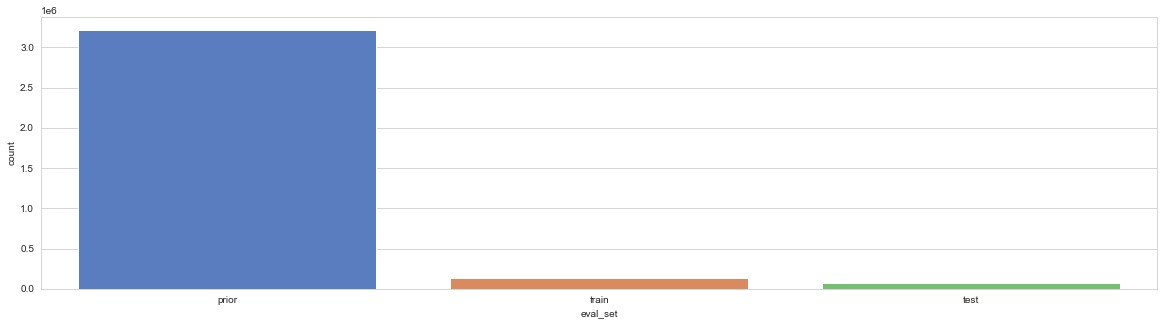

In [8]:
# Count of prior, train, test orders given in the data
sns.countplot(x='eval_set', data=orders, palette="muted")
plt.show()

From the datasource, a solution was provided for the "train" data in order to evaluate machine learning models. As this went beyond the scopy of my analysis, I filtered the data to use the "prior" data only. We will be analyzing the data of 3,421,083 orders.  

In [9]:
df_orders = orders[(orders.eval_set=="prior")]
total_orders = orders['order_id'].nunique()
print("Count of Total Orders: ", total_orders)

Count of Total Orders:  3421083


### Part 1: <span style="color:#60ab59">What products are most popular?</span> 
**What product and product categories (aisles, departments) are purchased the most?**

In [10]:
#LEFT JOIN order_products to products, then join on aisles and departments.
df1 = order_products.merge(products, on='product_id', how='left')
df2 = df1.merge(aisles, on='aisle_id', how='left')
dataframe = df2.merge(departments, on='department_id', how='left')
dataframe.head(10)  #this confirmed if the join worked correctly

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
Name: department, dtype: int64


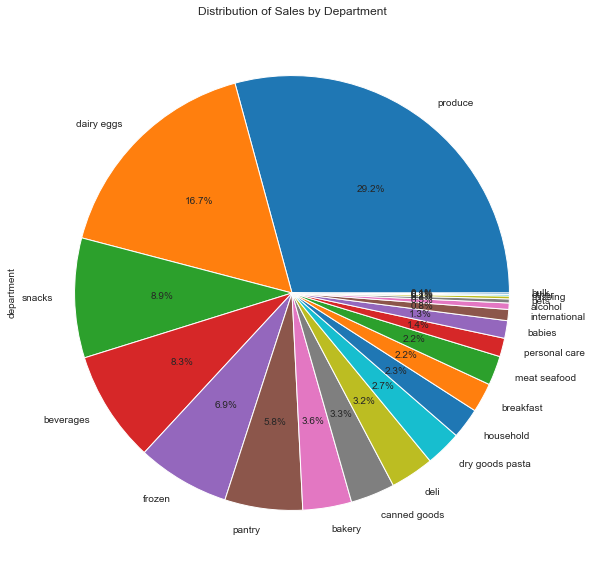

In [111]:
#Most popular departments of products?
departments_purchased = dataframe['department'].value_counts()
departments_purchased = departments_purchased.sort_values(ascending=False)
print(departments_purchased.head(10))

departments_purchased.plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))
plt.title('Distribution of Sales by Department')
plt.show()

*Produce is the top department, making up 29.2% of items purchased by users. Dairy eggs make up 16.7% and snacks make up 8.9% of products added to cart.*

fresh fruits                  3642188
fresh vegetables              3418021
packaged vegetables fruits    1765313
yogurt                        1452343
packaged cheese                979763
                               ...   
eye ear care                     8974
baby bath body care              8581
baby accessories                 8160
beauty                           6168
frozen juice                     4853
Name: aisle, Length: 134, dtype: int64


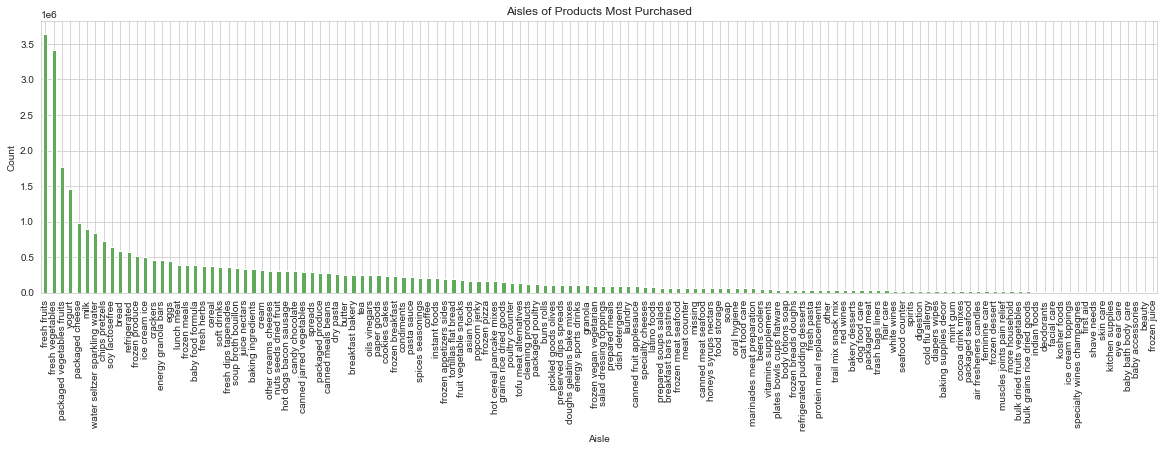

In [112]:
#Most popular aisles of products purchased?
aisles_purchased = dataframe['aisle'].value_counts()
aisles_purchased = aisles_purchased.sort_values(ascending=False)
print(aisles_purchased)

aisles_purchased.plot(kind='bar', color='#60ab59')
plt.title('Aisles of Products Most Purchased')
plt.xlabel('Aisle')
plt.ylabel('Count')
plt.show()

*Fresh vegetables, fresh fruit, and packaged vegetables/fruits are the top three aisles in terms of units added to cart, followed by yogurt. These are all perishable groceries.*

#### What are the top products?

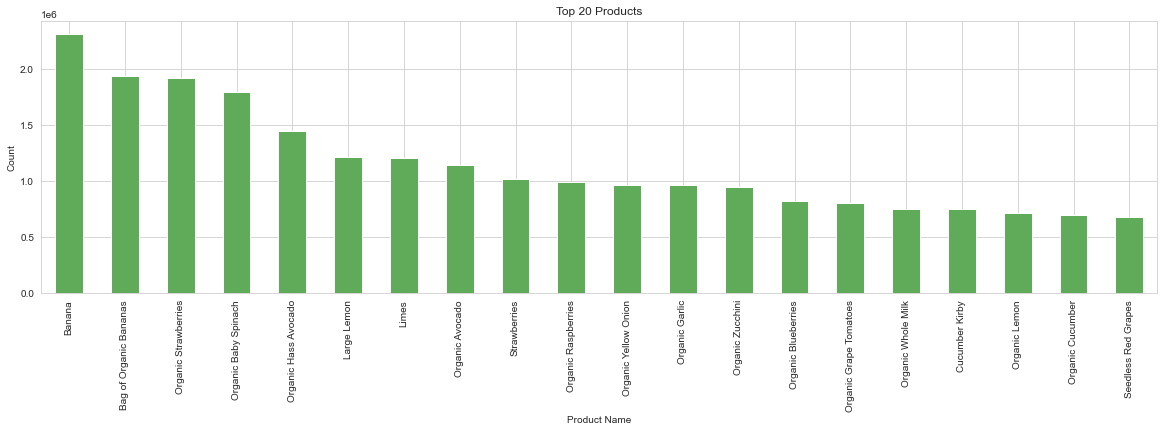

In [113]:
#What are the most purchased products (overall)? 
top_products = dataframe['product_name'].value_counts()
top_products = top_products.sort_values(ascending=False)
toptwenty = top_products_sorted.head(20)
#Plot Bar Graph
toptwenty.plot(kind='bar', color='#60ab59')
plt.title('Top 20 Products')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

*We can see that, of the 20 products most frequently added to carts by users, all are perishable items and with the exception of "Organic Whole Milk", most are fruits and vegetables. 15 of these are organic products.*

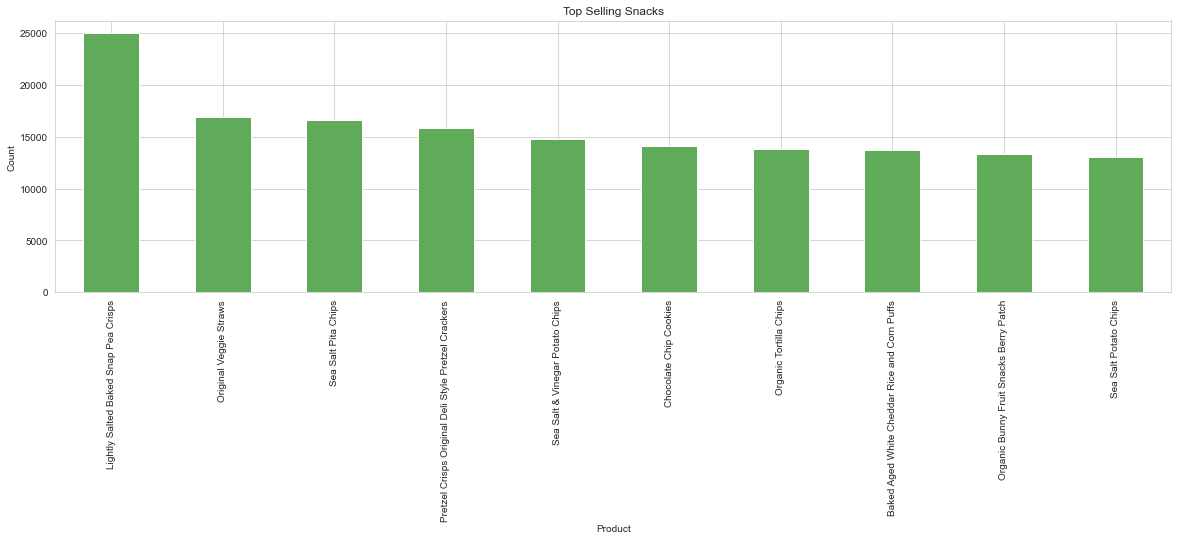

In [114]:
#What are the most popular snacks?
#Filter the dataframe to only Snacks Department:
snacks = dataframe[(dataframe.department=="snacks")]
#Group by Products added to cart; descending order
popsnacks = snacks['product_name'].value_counts()
popsnacks = popsnacks.sort_values(ascending=False)
topten = popsnacks.head(10)
#Plot Bar Graph
topten.plot(kind='bar', color='#60ab59')
plt.title('Top Selling Snacks')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

*Let's zoom into the snacks department, the third best-selling department. These are the top products within the snacks department.*

### Part 2: <span style="color:#60ab59">What products and product categories are reordered?</span> 

In [123]:
#REORDERED RATIO
reordered = dataframe['reordered'].mean()
reordered

0.5896974667922161

*Overall, 59% of products are reordered. Let's take a look at departments and aisles most reordered.*

department
dairy eggs         0.669969
beverages          0.653460
produce            0.649913
bakery             0.628141
deli               0.607719
pets               0.601285
babies             0.578971
bulk               0.577040
snacks             0.574180
alcohol            0.569924
meat seafood       0.567674
breakfast          0.560922
frozen             0.541885
dry goods pasta    0.461076
canned goods       0.457405
other              0.407980
household          0.402178
missing            0.395849
international      0.369229
pantry             0.346721
personal care      0.321129
Name: reordered, dtype: float64


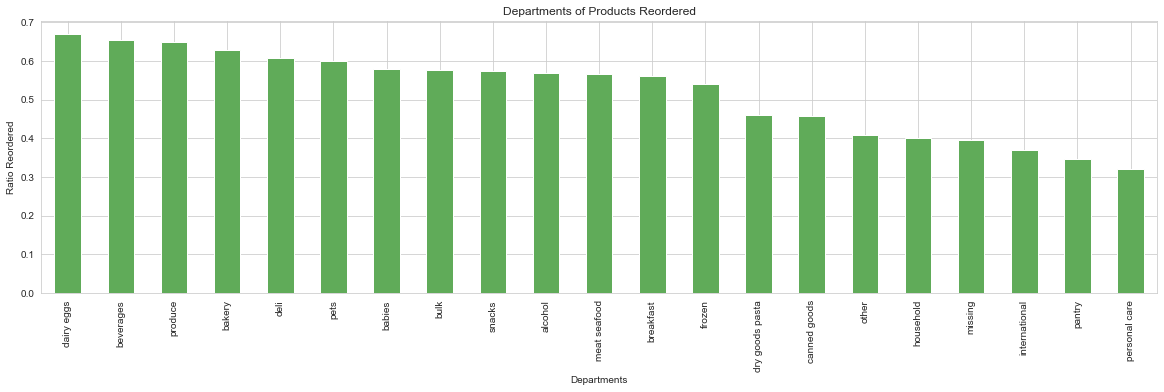

In [104]:
#DEPARTMENTS REORDERED
dept_reordered = dataframe.groupby('department')['reordered'].mean() #use mean to retrieve ratio reordered 
dept_reordered_sorted = dept_reordered.sort_values(ascending=False)
print(dept_reordered_sorted)

dept_reordered_sorted.plot(kind='bar', color='#60ab59')
plt.title('Departments of Products Reordered')
plt.xlabel('Departments')
plt.ylabel('Ratio Reordered')
plt.show()

*67% of dairy egg purchases are reorders. 65.3% of beverage purchases are reorders. 65% of produce purchases are reorders. Of the departments least reordered are pantry items (at 34.7%) and personal care items (at 32.1%).*

aisle
milk                             0.781428
water seltzer sparkling water    0.729593
fresh fruits                     0.718104
eggs                             0.705366
soy lactosefree                  0.692551
                                   ...   
beauty                           0.212062
kitchen supplies                 0.195377
first aid                        0.194812
baking supplies decor            0.167229
spices seasonings                0.152391
Name: reordered, Length: 134, dtype: float64


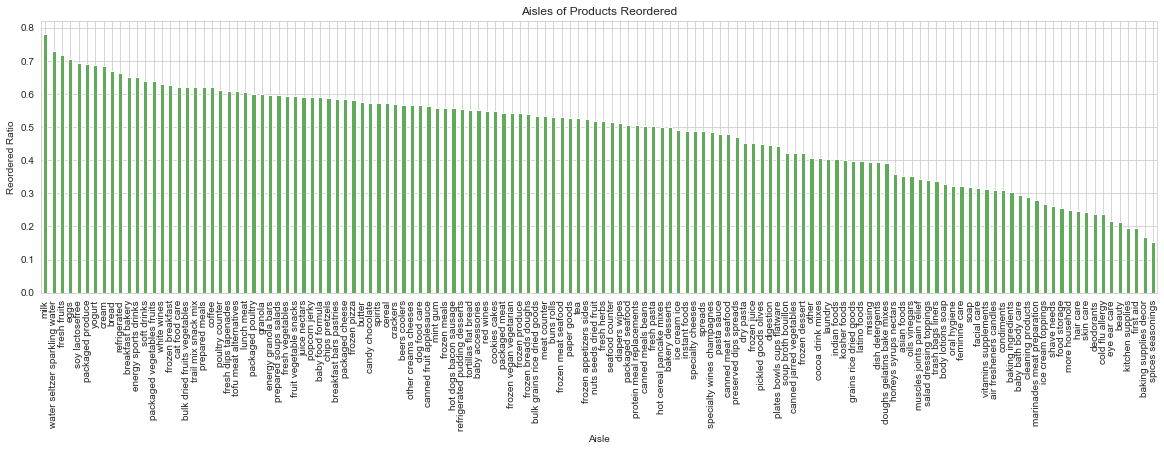

In [105]:
#AISLES REORDERED
aisles_reordered = dataframe.groupby('aisle')['reordered'].mean() #use mean to retrieve ratio reordered
aisles_reordered_sorted = aisles_reordered.sort_values(ascending=False)
print(aisles_reordered_sorted)

aisles_reordered_sorted.plot(kind='bar', color='#60ab59')
plt.title('Aisles of Products Reordered')
plt.xlabel('Aisle')
plt.ylabel('Reordered Ratio')
plt.show()

*Zooming into aisles, milk has a high reorder ratio at 78.1%, followed by selzter sparkling water at 73%, fresh fruits at 71.8% and eggs at 70.5%. Spice seasonings are least often reordered (at 15.2%), likely because they are shelf-stable and long lasting.*

#### Basket analysis: How many products do users tend to purchase?

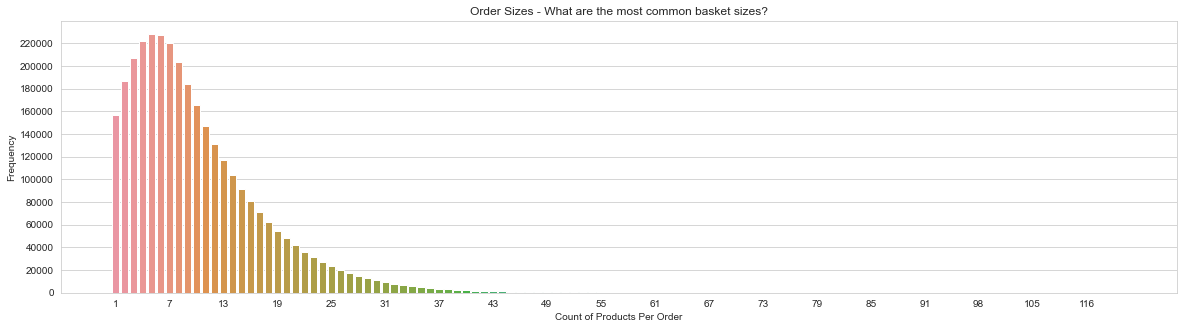

In [115]:
# Ploting a histogram for the # of products in an order
count_of_products = order_products.groupby(['order_id'], as_index=False)['product_id'].count()
count_of_products['count_of_products'] = count_of_products['product_id']
sns.countplot(x='count_of_products', data=count_of_products)
plt.xlabel('Count of Products Per Order')
plt.ylabel('Frequency')
plt.title('Frequency distribution of basket sizes')
plt.locator_params(nbins=20)
plt.show()

*We see a right-skewed distribution of basket sizes, with most orders containing approximately five products.*

**Basket analysis: Within an order, what is the ratio of reordered products?**

In [125]:
#Within an order, what is the ratio of reordered products?

for order_id in dataframe:
    total = order_id.value_counts()
    mean = reordered.mean() / total 
    return mean 


SyntaxError: 'return' outside function (1870409785.py, line 6)

### Part 3: <span style="color:#60ab59">How does time impact purchases?</span> 

#### Order frequency analysis: What is the time interval in between users' orders?

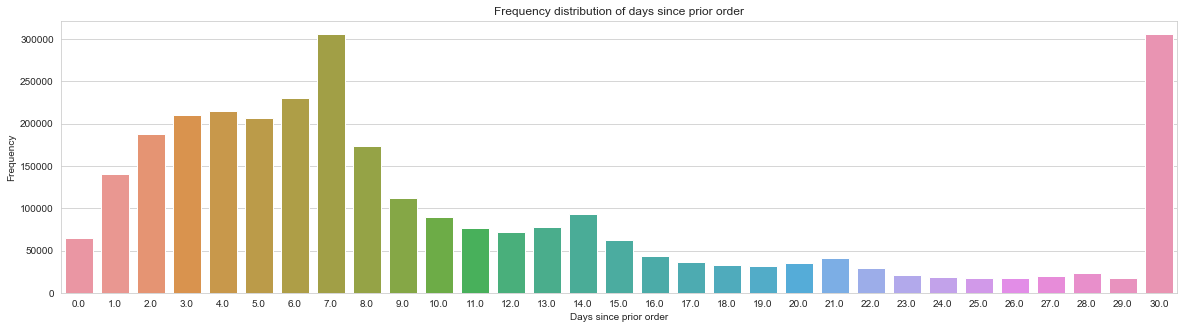

In [116]:
plt.figure()
sns.countplot(x="days_since_prior_order", data=df_orders)
plt.xlabel('Days since prior order')
plt.ylabel('Frequency')
plt.title("Frequency distribution of days since prior order")
plt.show()

*Users typically place another order within a week (7 days) or a month (30 days). There are smaller peaks at the 2-week (14 days) and 3-week (21 days) marks*.

**Does time of day or day of the week influence user purchase habits?**

In [117]:
time_orders = df_orders[['order_id', 'order_dow', 'order_hour_of_day']] #extract relevant columns from orders
#time_orders.head(10)

#join order_products with time_orders
timedf = order_products.merge(time_orders, on='order_id', how='left')
timedf.head(10)

,order_id,product_id,add_to_cart_order,reordered,order_dow,order_hour_of_day
0,2,33120,1,1,5,9
1,2,28985,2,1,5,9
2,2,9327,3,0,5,9
3,2,45918,4,1,5,9
4,2,30035,5,0,5,9
5,2,17794,6,1,5,9
6,2,40141,7,1,5,9
7,2,1819,8,1,5,9
8,2,43668,9,0,5,9
9,3,33754,1,1,5,17


#### What day of week are orders typically made?

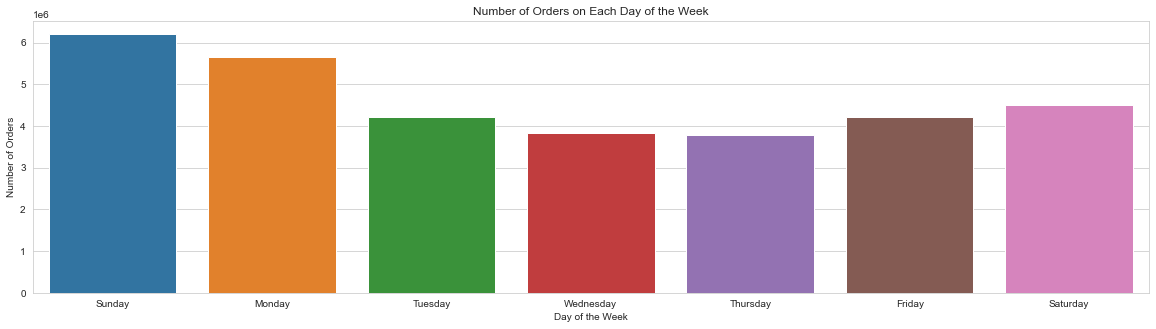

In [20]:
#When are orders made? (Day of Week)
#map dictionary to change order_dow from integers 0-6 into the names of the day of week
timedf['order_dow'] = timedf['order_dow'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'})
#set categorical order
timedf['order_dow'] = pd.Categorical(timedf['order_dow'],
categories=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)

sns.countplot(x="order_dow", data=timedf, palette=sns.color_palette())
plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.title('Number of Orders on Each Day of the Week')
plt.show()

*The beginning of the week (Sunday and Monday) has the highest traffic of users placing orders; orders dip to their lowest in the middle of the week (Wednesday) and increase towards the weekends.*

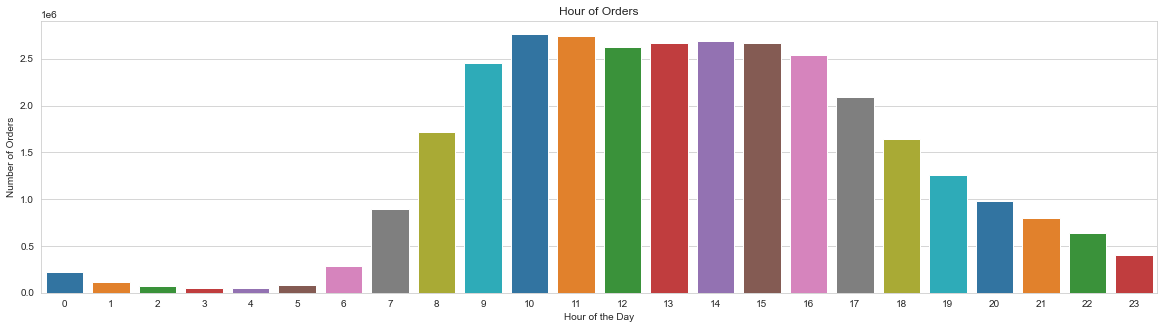

In [21]:
#When are orders made? (Hour of Day)
sns.countplot(x="order_hour_of_day", data=timedf, palette=sns.color_palette())
plt.ylabel('Number of Orders')
plt.xlabel('Hour of the Day')
plt.title('Hour of Orders')
plt.show()

*Most orders are made in the late mornings to early afternoons (10am-3pm), and there is a dip at noon.*

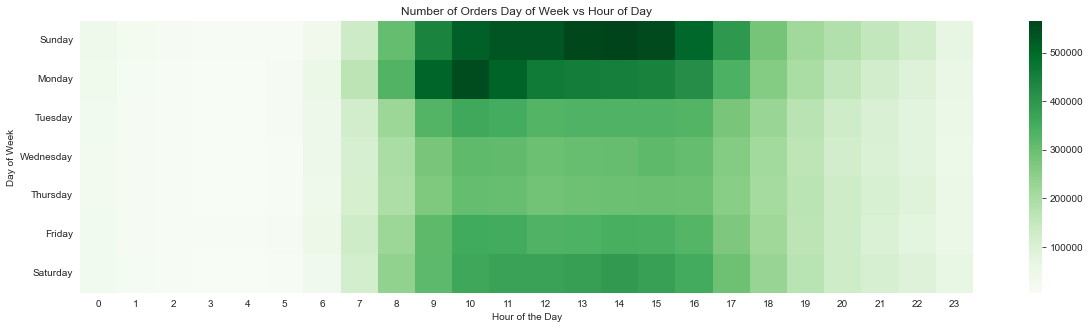

In [22]:
#Heat Map of day of week x hour of day
group_hour_dow = timedf.groupby(['order_dow', 'order_hour_of_day'])['order_id'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_id')

sns.heatmap(group_hour_dow, cmap="Greens")
plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.title('Number of Orders Day of Week vs Hour of Day')
plt.show()

*This heat map indicates that Sunday afternoon and Monday late mornings are the highest traffic times for orders on the app.*

**How does day of week influence what products are purchased?**

In [25]:
#How many unique products are featured in this dataset?
print(timedf.nunique()) #timedf has 6 columns; product_id is the second column

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
order_dow                  7
order_hour_of_day         24
dtype: int64


Since there are 49,677 products in this dataset, we'll take a bigger picture analysis of the aisle and department level trends over time.

In [26]:
#merge timedf to products to get product name, where ptdf = product time dataframe
ptdf = timedf.merge(products, on='product_id', how='left')
ptdf.head(10)

,order_id,product_id,add_to_cart_order,reordered,order_dow,order_hour_of_day,product_name,aisle_id,department_id
0,2,33120,1,1,Friday,9,Organic Egg Whites,86,16
1,2,28985,2,1,Friday,9,Michigan Organic Kale,83,4
2,2,9327,3,0,Friday,9,Garlic Powder,104,13
3,2,45918,4,1,Friday,9,Coconut Butter,19,13
4,2,30035,5,0,Friday,9,Natural Sweetener,17,13
5,2,17794,6,1,Friday,9,Carrots,83,4
6,2,40141,7,1,Friday,9,Original Unflavored Gelatine Mix,105,13
7,2,1819,8,1,Friday,9,All Natural No Stir Creamy Almond Butter,88,13
8,2,43668,9,0,Friday,9,Classic Blend Cole Slaw,123,4
9,3,33754,1,1,Friday,17,Total 2% with Strawberry Lowfat Greek Strained...,120,16


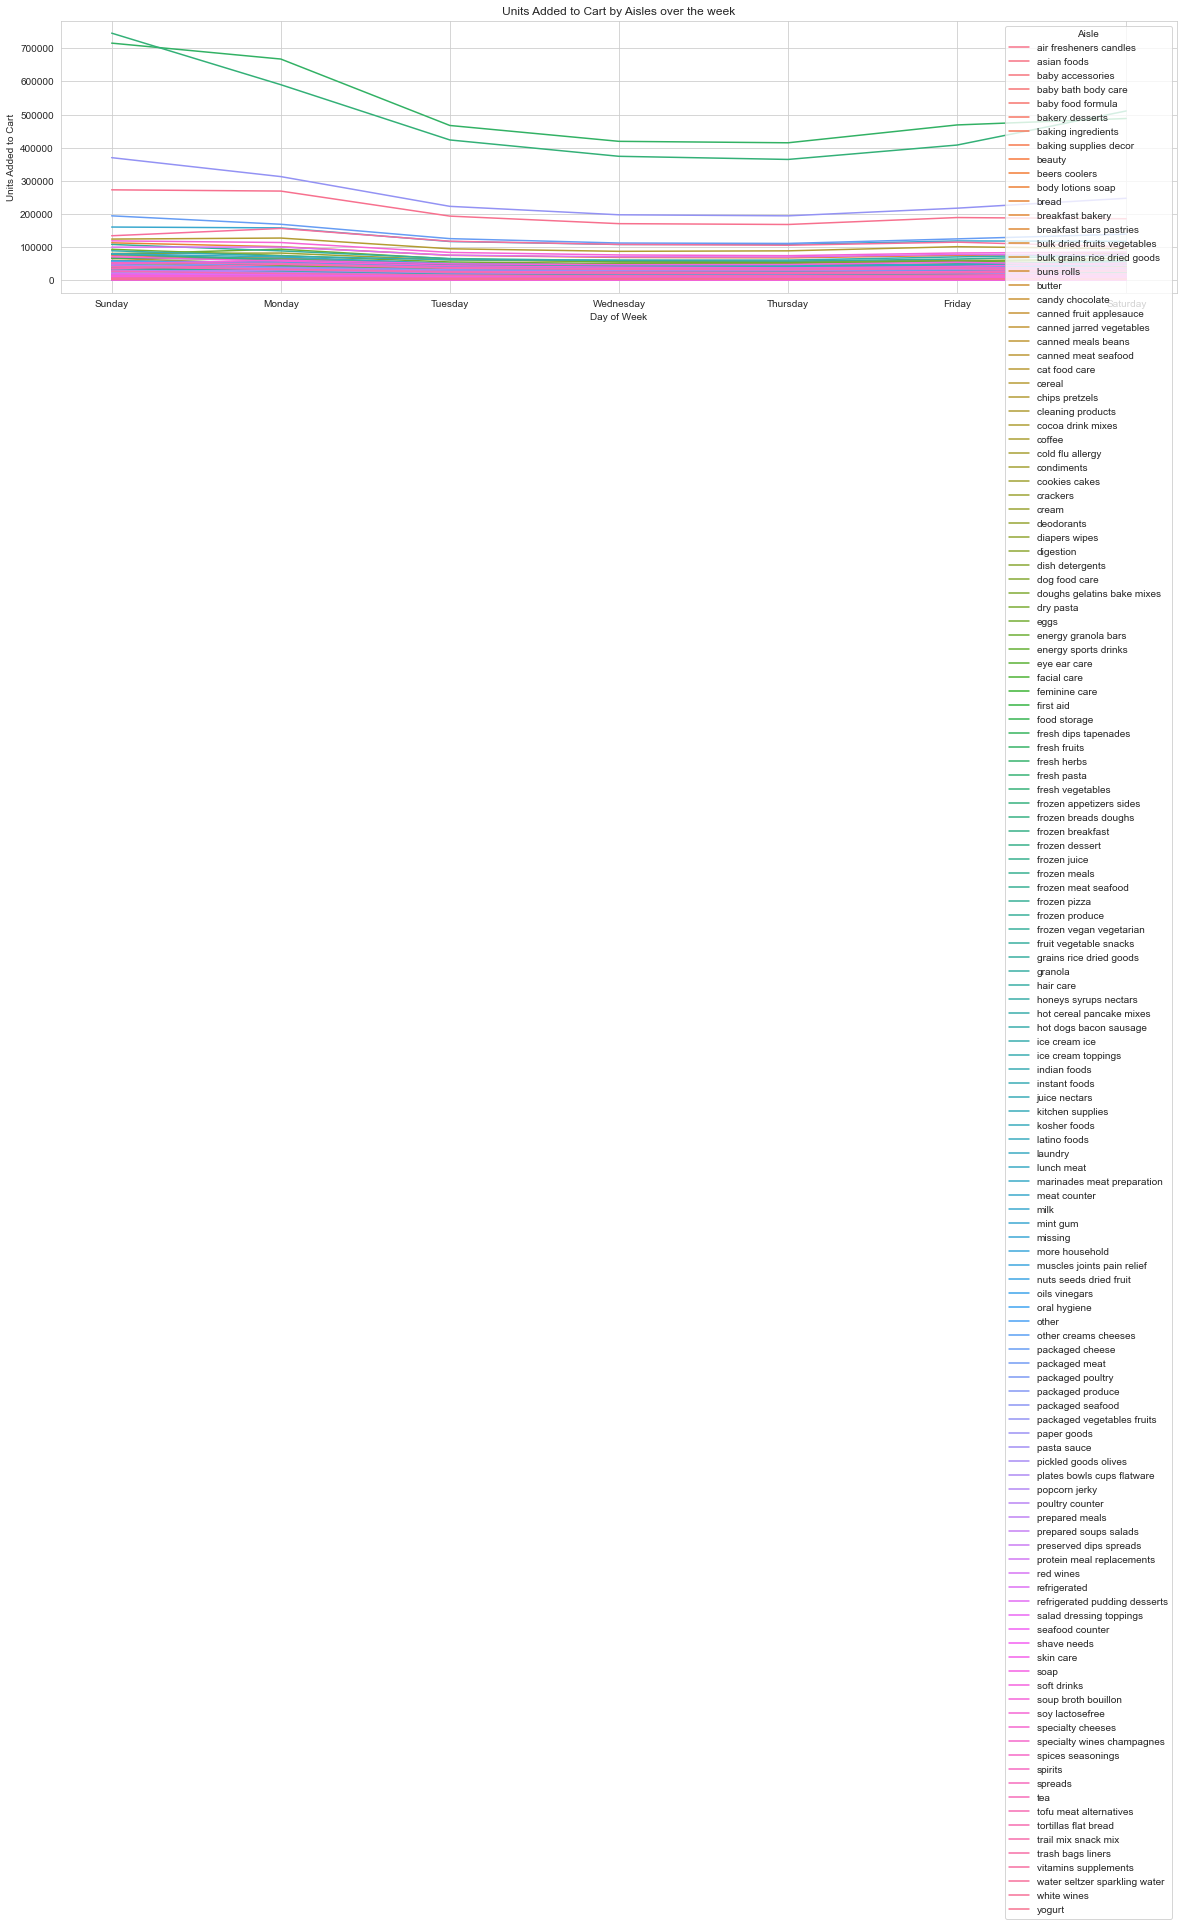

In [60]:
#Aisles Sold by Day

#merge ptdf with aisles
dow_aisles = ptdf.merge(aisles, on='aisle_id', how='left')

dow_aisles = dow_aisles.groupby(['aisle','order_dow']).size().reset_index()
dow_aisles.columns=['Aisle', 'Day of Week', 'Units Added to Cart']
dow_aisles
g=sns.lineplot(x='Day of Week', y='Units Added to Cart', data=dow_aisles, hue='Aisle')
g.set_title("Units Added to Cart by Aisles over the week")
plt.show()

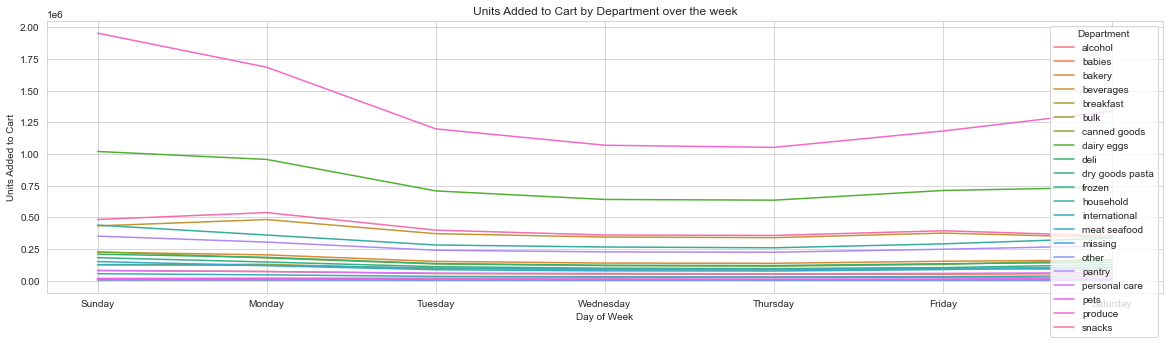

In [62]:
#Departments Sold by Day

#merge ptdf with departments
dow_dept = ptdf.merge(departments, on='department_id', how='left')

dow_dept = dow_dept.groupby(['department','order_dow']).size().reset_index()
dow_dept.columns=['Department', 'Day of Week', 'Units Added to Cart']
dow_dept
g=sns.lineplot(x='Day of Week', y='Units Added to Cart', data=dow_dept, hue='Department')
g.set_title("Units Added to Cart by Department over the week")
plt.show()

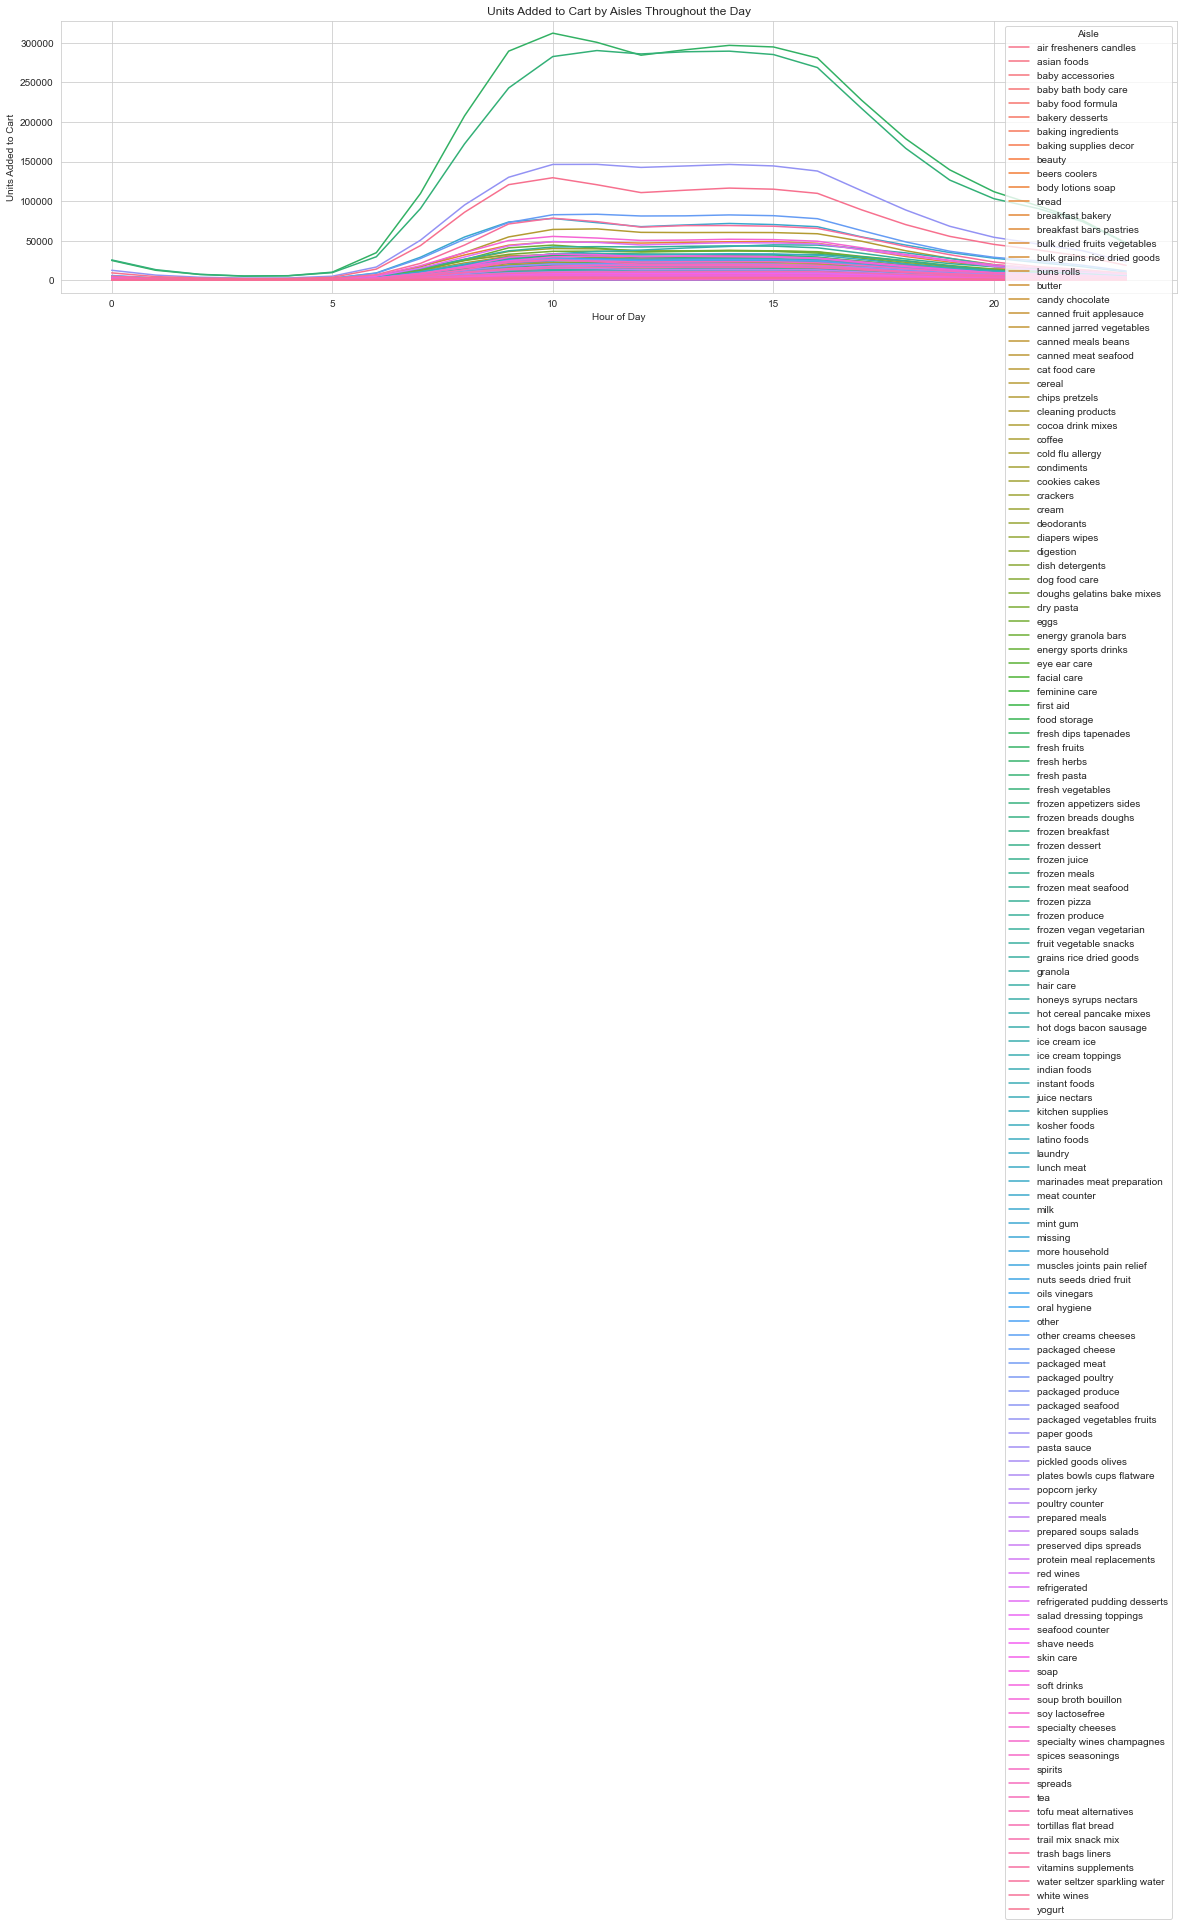

In [66]:
#Aisles Sold by Hour

#merge 
hod_aisles = ptdf.merge(aisles, on='aisle_id', how='left')
hod_aisles = hod_aisles.groupby(['aisle','order_hour_of_day']).size().reset_index()
hod_aisles.columns=['Aisle', 'Hour of Day', 'Units Added to Cart']
hod_aisles
g=sns.lineplot(x='Hour of Day', y='Units Added to Cart', data=hod_aisles, hue='Aisle')
g.set_title("Units Added to Cart by Aisles Throughout the Day")
plt.show()

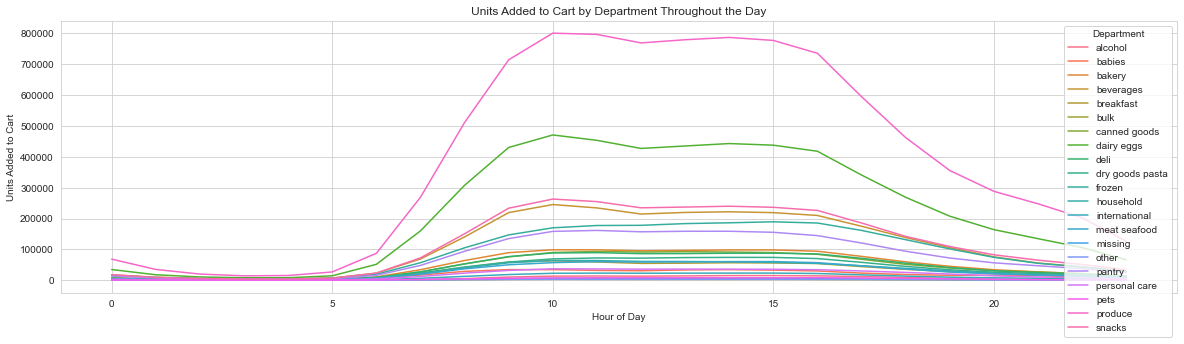

In [70]:
#Departments Sold by Hour

#merge ptdf with departments
hod_dept = ptdf.merge(departments, on='department_id', how='left')

hod_dept = hod_dept.groupby(['department','order_hour_of_day']).size().reset_index()
hod_dept.columns=['Department', 'Hour of Day', 'Units Added to Cart']
hod_dept
g=sns.lineplot(x='Hour of Day', y='Units Added to Cart', data=hod_dept, hue='Department')
g.set_title("Units Added to Cart by Department Throughout the Day")
plt.show()

*Hourly and daily trends at both the aisle and department levels align to the overall order trends. I was hoping to identify whether certain product categories (aisles, departments) were more popular at certain hours of the day or day of the week, but that doesn't seem to be the case.*

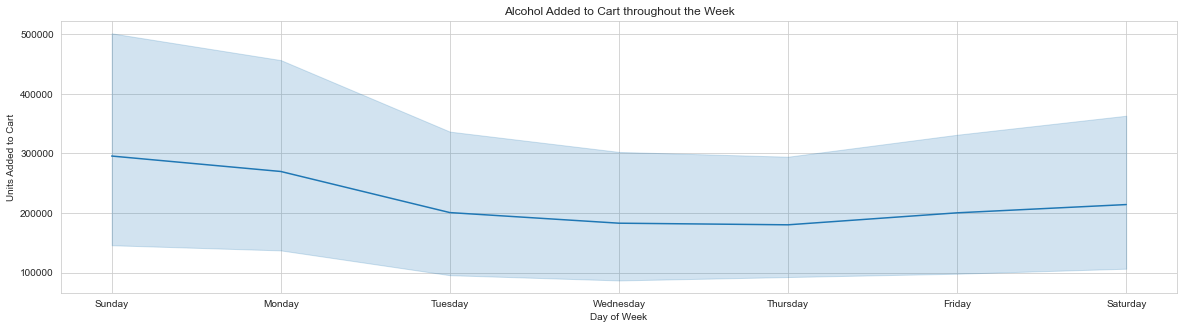

In [78]:
#Is alcohol purchased more on the weekends?
#filter dow_dept for alcohol department only
alcohol = dow_dept[(dow_dept.Department=="alcohol")]
alcohol
g=sns.lineplot(x='Day of Week', y='Units Added to Cart', data=dow_dept)
g.set_title("Alcohol Added to Cart throughout the Week")
plt.show()

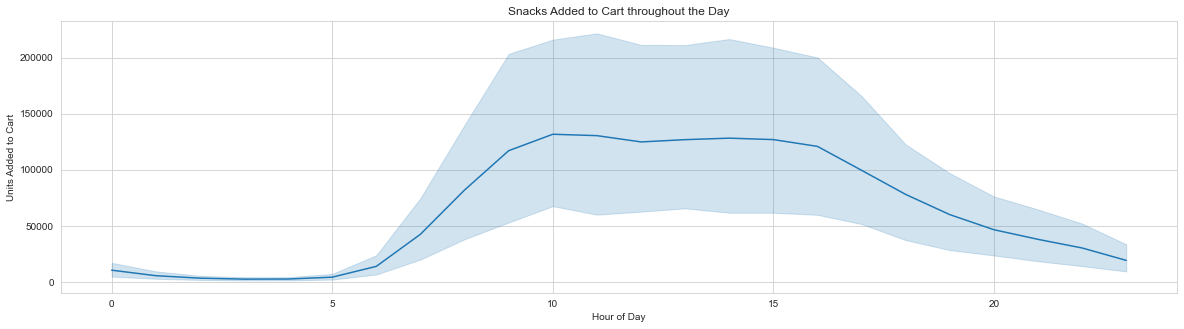

In [80]:
#Are snacks purchased more in the evening hours?
#filter hod_dept for snacks department only
snack = hod_dept[(hod_dept.Department=="snacks")]
snack
g=sns.lineplot(x='Hour of Day', y='Units Added to Cart', data=hod_dept)
g.set_title("Snacks Added to Cart throughout the Day")
plt.show()

*I hypothesized that perhaps alcohol sales would be higher towards the weekend, or that users would purchase snacks more towards the end of the day, but the trends follow the overall high traffic order times.*

## <span style="color:darkorange">Insights & Proposed Actions</span> 

From the above analyses, we can glean potential business solutions to inform the app design, organization, and create strategic promotions that would enhance the user experience.
### Proposed Action #1: <span style="color:#60ab59">Product Promotion and Organization</span> 
From the product and product category analysis, I found that:
<ul>
    <li> Produce (29.2%), dairy eggs (16.7%), and snacks (8.9%) comprise the top three selling departments </li>
    <li> Fresh fruit, fresh vegetables, packaged vegetables fruits, yogurt and cheese comprise the top five aisles of products </li>
    <li> Of the top 20 bestselling products, most are fruits and vegetables; many of these are organic </li>
    <li> Dairy eggs, beverages, and produce are departments that have the highest reorder ratios (66.9969%, 65.3460%, and 64.9913%, respectively). Pantry items and personal care have the lowest reorder ratios. </li>
    <li> At the aisle level, milk (78.1428%), seltzer or sparkling water (72.9593%), fresh fruits (71.8104%) and eggs (70.5366%) have the highest reorder ratios; baking supplies decor and spice seasonings have the lowest reorder ratios.</li>
</ul>

Much research has been conducted on consumer buying behaviors in traditional in-store shopping contexts that we can apply to Instacart's convenient digital grocery shopping platform.

A consumer study found that: 
>"...[I]ncreasing path length by 10% for each shopper (an average of around 140 feet) will increase unplanned spending by about 14.4%...We find that by strategically promoting an additional product category (hence adding an additional “planned” category into a consumer’s shopping list), the overall amount of unplanned purchase can be increased by as much as 28%"
> "...[A] coupon that required shoppers to travel farther from their planned path resulted in a substantial increase in unplanned spending...over a coupon for an unplanned category near their planned path... The results suggest that targeted mobile promotions aimed at increasing in-store path length can increase unplanned spending" and "[s]imulations based on the authors’ estimates suggest that strategically promoting three product categories through mobile promotion could increase unplanned spending by 16.1%"$^{1}$. 

Since Instacart allows for shoppers to select products from the convenience of their homes - no travel necessary - we can apply this finding and translate physical "path length" into length scrolling through the app, or time spent scrolling through aisles and departments in the app.

**One way to increase users' digital "path length" would be to place aisles with high rates of orders and reorders (e.g. fruits, vegetables, dairy products) in at least the fourth position. Email campaigns with digital coupons (discounts or sales in the form of digital coupons) in aisles strategically organized to increase digital "path length" could also be distributed.**


### Proposed Action #2: <span style="color:#60ab59">Alerts and Promotions</span> 
From the analysis of time metrics on orders, I found that:
<ul>
    <li> Most users place their next orders 7 or 30 days after the previous order</li>
    <li> Most order traffic occurs at the beginning of the week on Sundays and Mondays, with slowest traffic mid-week on Wednesdays </li>
    <li> Highest order traffic occurs during the late afternoon (10-11am) and early afternoons, with a lull around noon</li>
</ul>

**We can leverage this data to push notifications and reminders for users to get their grocery shopping done at the beginning of the week** ("Are you ready for the week?", "Tag us in your grocery haul with #mealprepmonday!" or, "Do you need more [insert product name of frequently repurchased items]?")

**We can also push promotions, sales, and discounts for orders on Wednesday to increase order traffic on slower traffic days.**


### Proposed Action #3: <span style="color:#60ab59">Full Cart Promotions</span> 
In a traditional in-person shopping model, the size of a grocey cart can influence the purchasing habits of a consumer *("if the cart is double the size of our regular one, [consumers] buy an astounding 40 percent more than [they] usually do"-HBR$^{2}$)*. In the analysis above, I found that most digital carts have approximately *5 items per order*. Without the visual cue of a large, empty shopping cart to fill, **we can encourage larger cart sizes through promotions such as discounts or reduced/waived service fees with ten or more items. Such "full cart promotions" could encourage users to make unplanned purchases that would boost higher sales.**

#### <span style="color:darkorange">References</span> 

1. Yanliu Huang, Sam Hui , J. Jeffrey Inman , and Jacob Suher (2011) ,"The Effect of In-Store Travel Distance on Unplanned Purchase With Applications to Store Layout and Mobile Shopping Apps", in NA - Advances in Consumer Research Volume 39, eds. Rohini Ahluwalia, Tanya L. Chartrand, and Rebecca K. Ratner, Duluth, MN : Association for Consumer Research, Pages:136-137. 
https://www.acrwebsite.org/volumes/v39/acr_v39_9723.pdf

2. Lindstrom, M. (2011). Shopping Carts Will Track Consumers' Every Move. Harvard Business Review.
https://hbr.org/2011/12/shopping-carts-will-track-cons 